In [ ]:
## Introduction

In [ ]:
## Outline
# 1.  Data Ingestion & Wrangling
# 1a. County Wifi Locations dataset
# 1b. Public Schools Dataset
# 1c. Xfinity Wifi Locations
# 1d. MPCS School report

# 2. Exploratory Data Analysis 
# 2a. County Govermeny Wifi Locations
# 2b. Public Schools
# 1c. Xfinity Wifi Locations
# 1d. MPCS School report

# 3. Statistical Analysis

# 4. Mapping

In [1]:
## 1.  Data Ingestion & Wrangling

In [2]:
# importing the packages 
import pandas as pd
import numpy as np

In [ ]:
# 1a. County Wifi Locations dataset

In [3]:
# reading the csv files for county government wifi locations
df = pd.read_csv('county_government_wifi_locations.csv')

In [4]:
# viewing the head of the dataframe
df.head()

,Agency,Department,Name,Address,Location
0,MCG,DPL,White Oak Library,"11701 New Hampshire Avenue, Silver Spring, MD ...",NaN
1,MCG,RSC,Sidney Kramer Upcounty Service ctr.,"12900 Middlebrook Road, Germantown MD",POINT (-77.267914 39.179332)
2,MCG,DTS,L3 Helpdesk & Office,"7361 Calhoun Plaza, Rockville, MD 20850",NaN
3,MCG,CAO/CEX/CC/Courts,OIG/ERP Office,"51 Monroe Street, Rockville, MD 20850",POINT (-90.409668 40.720439)
4,MCG,FRS,F&RS,"19801 Bealsville Road, Bealsville, MD 20839",NaN


In [5]:
# viewing the unique departments that the data contains
df.Department.unique()

array(['DPL', 'RSC', 'DTS', 'CAO/CEX/CC/Courts', 'FRS', 'REC', 'DOT',
       'DGS', 'HHS', 'BOE', 'DED/DEP', 'DOCR', 'MCPD', 'DLC',
       'PIO/PublicSafety', 'Warehouse', 'DHS', 'DPS'], dtype=object)

In [6]:
# Looking at how many are missing
# it is an issue that there is missing data because that will affect in plotting the points
df.Location.isnull().sum() 

34

In [13]:
# fixing the way that the "points" are in the dataframe
# socrata POINT datatypes list their coordinates as "longitude,latitude"
df[["Longitude", "Latitude"]] = df["Location"].str.replace("POINT \(","").str.replace("\)","").str.split(" ", expand=True)
print(df)

    Agency         Department                                 Name  \
0      MCG                DPL                    White Oak Library   
1      MCG                RSC  Sidney Kramer Upcounty Service ctr.   
2      MCG                DTS                 L3 Helpdesk & Office   
3      MCG  CAO/CEX/CC/Courts                       OIG/ERP Office   
4      MCG                FRS                                 F&RS   
..     ...                ...                                  ...   
173    MCG                DGS                   Swing Office Space   
174    MCG                HHS             HHS - 1301 Piccard Drive   
175    MCG                FRS              Wheaton Resource Center   
176    MCG                DOT     Colesville Highway Service Depot   
177    MCG                RSC             Bethesda/Chevy Chase RSC   

                                               Address  \
0    11701 New Hampshire Avenue, Silver Spring, MD ...   
1                12900 Middlebrook Road, Ge

In [8]:
# using geopy to fill in the missing data.
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="capstone")

In [9]:
# the NaN are floats
type(df['Location'][0])

float

In [10]:
# the values that are not missing in locations are strings
type(df['Location'][10])

str

In [11]:
# counting the number of times the geolocator fails
failed = 0 
# getting the value and index of the all the rows
for row_num, row in enumerate(df["Location"]):
  # if the value is NaN (float type) 
  if type(row) == float:
    # geocode the address at the same row
    location = geolocator.geocode(df["Address"][row_num])
    # if geocoded successfully
    if location is not None:
      df["Latitude"][row_num] = location.latitude
      df["Longitude"][row_num] = location.longitude
    else:
      failed += 1
      print(df["Address"][row_num])
print(failed)

7361 Calhoun Plaza,  Rockville, MD 20850
19801 Bealsville Road, Bealsville, MD 20839
8540 Anniversary Drive, Gaithersburg, MD 20877
8630 Fenton Street, 10th floor, Silver Spring, MD
1400 Spring St suite 305, Silver Spring, MD 20910
19300 Georgia Avenue, Brookville,  MD 20833
3300 Briggs Chaney Road, Silver Spring, MD 20904
14715 Good Hope Road, Silver Spring, MD 20905
13900 Old Columbia Pike, Silver Spring, MD 20904
14910 Old Comumbia Pike, Burtonsville, MD 20866
18905 Kingsview Drive, Germantown, MD, 20874
4407 Aspen Hill Road, Rockville, MD
14335 Cape May Road, Silver Spring, MD 20904
13


In [15]:
geolocator = Nominatim(user_agent="Your_Name")
location = geolocator.geocode('7361 Calhoun Plaza Maryland')
print(location.address)
print((location.latitude, location.longitude))

7361, Calhoun Place, Derwood, Montgomery County, Maryland, 20855, United States
(39.108051387755104, -77.15035867346938)


In [ ]:
# 1b. Public Schools Dataset

In [ ]:
# reading and viewing the head of the csv files for county government wifi locations
df2 = pd.read_csv('Public_Schools.csv')
df2.head()

In [ ]:
# Change the column names, lower case and removing spaces
df2.columns =['category', 'school_Name', 'address', 'city', 'zip_code', 'phone','url','longitude','latitude','location']
df2.head()

In [ ]:
# changing the lables of the departments

In [ ]:
# checking that there is no null in longitude and latitde
df2.longitude.isnull().sum()
df2.latitude.isnull().sum()

In [ ]:
## 2. Exploratory Data Analysis 

In [ ]:
# import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 2a. County Govermeny Wifi Locations

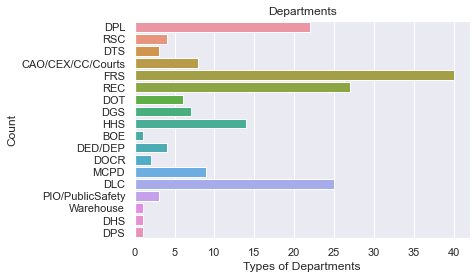

In [20]:
sns.set_theme(style="darkgrid")
sns.countplot(y='Department',data=df)
plt.xlabel('Types of Departments')
plt.ylabel('Count')
plt.title('Departments')
plt.show()

In [ ]:
# 2b. Public Schools

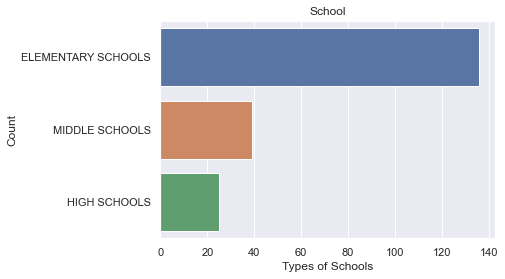

In [47]:
# graphing the number of categories of schools
sns.set_theme(style="darkgrid")
sns.countplot(y='category',data=df2)
plt.xlabel('Types of Schools')
plt.ylabel('Count')
plt.title('School')
plt.show()

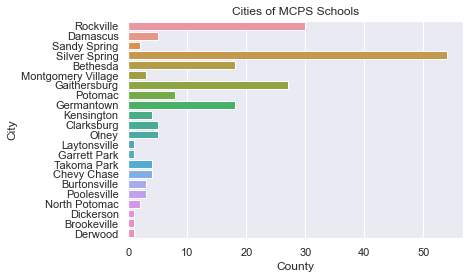

In [48]:
sns.set_theme(style="darkgrid")
sns.countplot(y='city',data=df2)
plt.xlabel('County')
plt.ylabel('City')
plt.title('Cities of MCPS Schools')
plt.show()